## DATA MINING JUMLAH PENUMPANG BUSWAY TRANSJAKARTA MENGGUNAKAN ALGORITMA K-MEANS CLUSTERING

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline 

In [126]:
df = pd.read_excel('jumlahpenumpang.xlsx')

In [127]:
df.head(15)

,Koridor,2019,2020
0,Koridor I (Blok M-Kota),28703262,13114712
1,Koridor II (Pulo Gadung-Harmoni),9569953,4788613
2,Koridor III (Kalideres-Pasar Baru),12809507,6685591
3,Koridor IV (Pulo Gadung 2-Dukuh Atas),9221017,4103583
4,Koridor V (Kp. Melayu-Ancol),12329691,5959530
5,Koridor VI (Ragunan-Dukuh Atas 2),12051594,5526020
6,Koridor VII (Kp. Rambutan-Kp. Melayu),11558274,5330683
7,Koridor VIII (Lebak Bulus-Harmoni),12504656,6288549
8,Koridor IX (Pinang Ranti-Pluit),17527958,6288549
9,Koridor X (PGC 2-Tanjung Priok),9960874,5545169


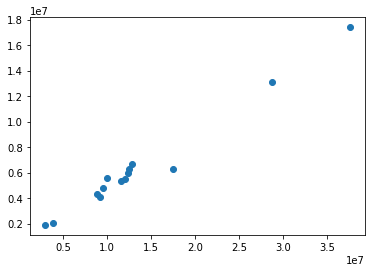

In [128]:
plt.scatter(df[2019], df[2020])

In [129]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [130]:
y_predicted = km.fit_predict(df[[2019,2020]])
y_predicted

C:\Users\ajiah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1])

In [131]:
df['cluster'] = y_predicted
df.head(15)

,Koridor,2019,2020,cluster
0,Koridor I (Blok M-Kota),28703262,13114712,1
1,Koridor II (Pulo Gadung-Harmoni),9569953,4788613,2
2,Koridor III (Kalideres-Pasar Baru),12809507,6685591,2
3,Koridor IV (Pulo Gadung 2-Dukuh Atas),9221017,4103583,2
4,Koridor V (Kp. Melayu-Ancol),12329691,5959530,2
5,Koridor VI (Ragunan-Dukuh Atas 2),12051594,5526020,2
6,Koridor VII (Kp. Rambutan-Kp. Melayu),11558274,5330683,2
7,Koridor VIII (Lebak Bulus-Harmoni),12504656,6288549,2
8,Koridor IX (Pinang Ranti-Pluit),17527958,6288549,2
9,Koridor X (PGC 2-Tanjung Priok),9960874,5545169,2


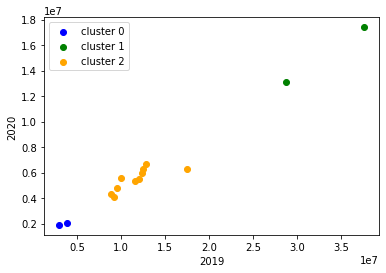

In [132]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1[2019], df1[2020], color= 'blue', label='cluster 0')
plt.scatter(df2[2019], df2[2020], color= 'green', label ='cluster 1')
plt.scatter(df3[2019], df3[2020], color= 'orange', label ='cluster 2')

plt.xlabel(2019)
plt.ylabel(2020)
plt.legend()

In [133]:
scaler = MinMaxScaler()
scaler.fit(df[[2020]])
df[2020] = scaler.transform(df[[2020]])

scaler.fit(df[[2019]])
df[2019] = scaler.transform(df[[2019]])

In [134]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[[2019,2020]])
y_predicted

C:\Users\ajiah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1])

In [135]:
km.cluster_centers_

array([[0.24984379, 0.23101365],
       [0.87215439, 0.86167564],
       [0.01250974, 0.00459107]])

In [136]:
km.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1])

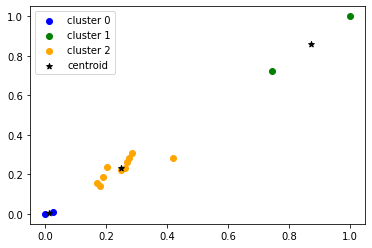

In [137]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1[2019], df1[2020], color= 'blue', label='cluster 0')
plt.scatter(df2[2019], df2[2020], color= 'green', label ='cluster 1')
plt.scatter(df3[2019], df3[2020], color= 'orange', label ='cluster 2')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black', marker='*', label='centroid')
plt.legend()

In [138]:
k_rng = range(1,13)

sse


[1.8447407001647473,
 0.32789905291320276,
 0.14857465411823462,
 0.07761839523824424,
 0.03154044653805918,
 0.011716502790229085,
 0.004952287423916389,
 0.0030116278870368995,
 0.0018727208536121133,
 0.0009122175255477222,
 0.0005570746014778649,
 0.0003191039725068804]

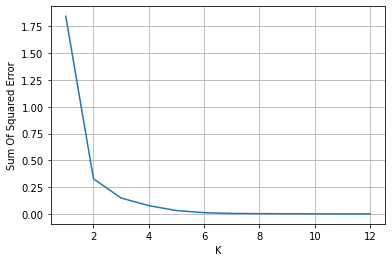

In [142]:
plt.xlabel('K')
plt.ylabel('Sum Of Squared Error')
plt.plot(k_rng, sse)
plt.grid()

In [140]:
selected_cols = [2019, 2020]
cluster_data = df.loc[:, selected_cols]

kmeans_sel = KMeans(init='k-means++', n_clusters=3, n_init=100, random_state=2).fit(cluster_data)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

In [141]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

,2019,2020
Cluster,,
0,0.0,0.0
1,0.9,0.9
2,0.2,0.2
